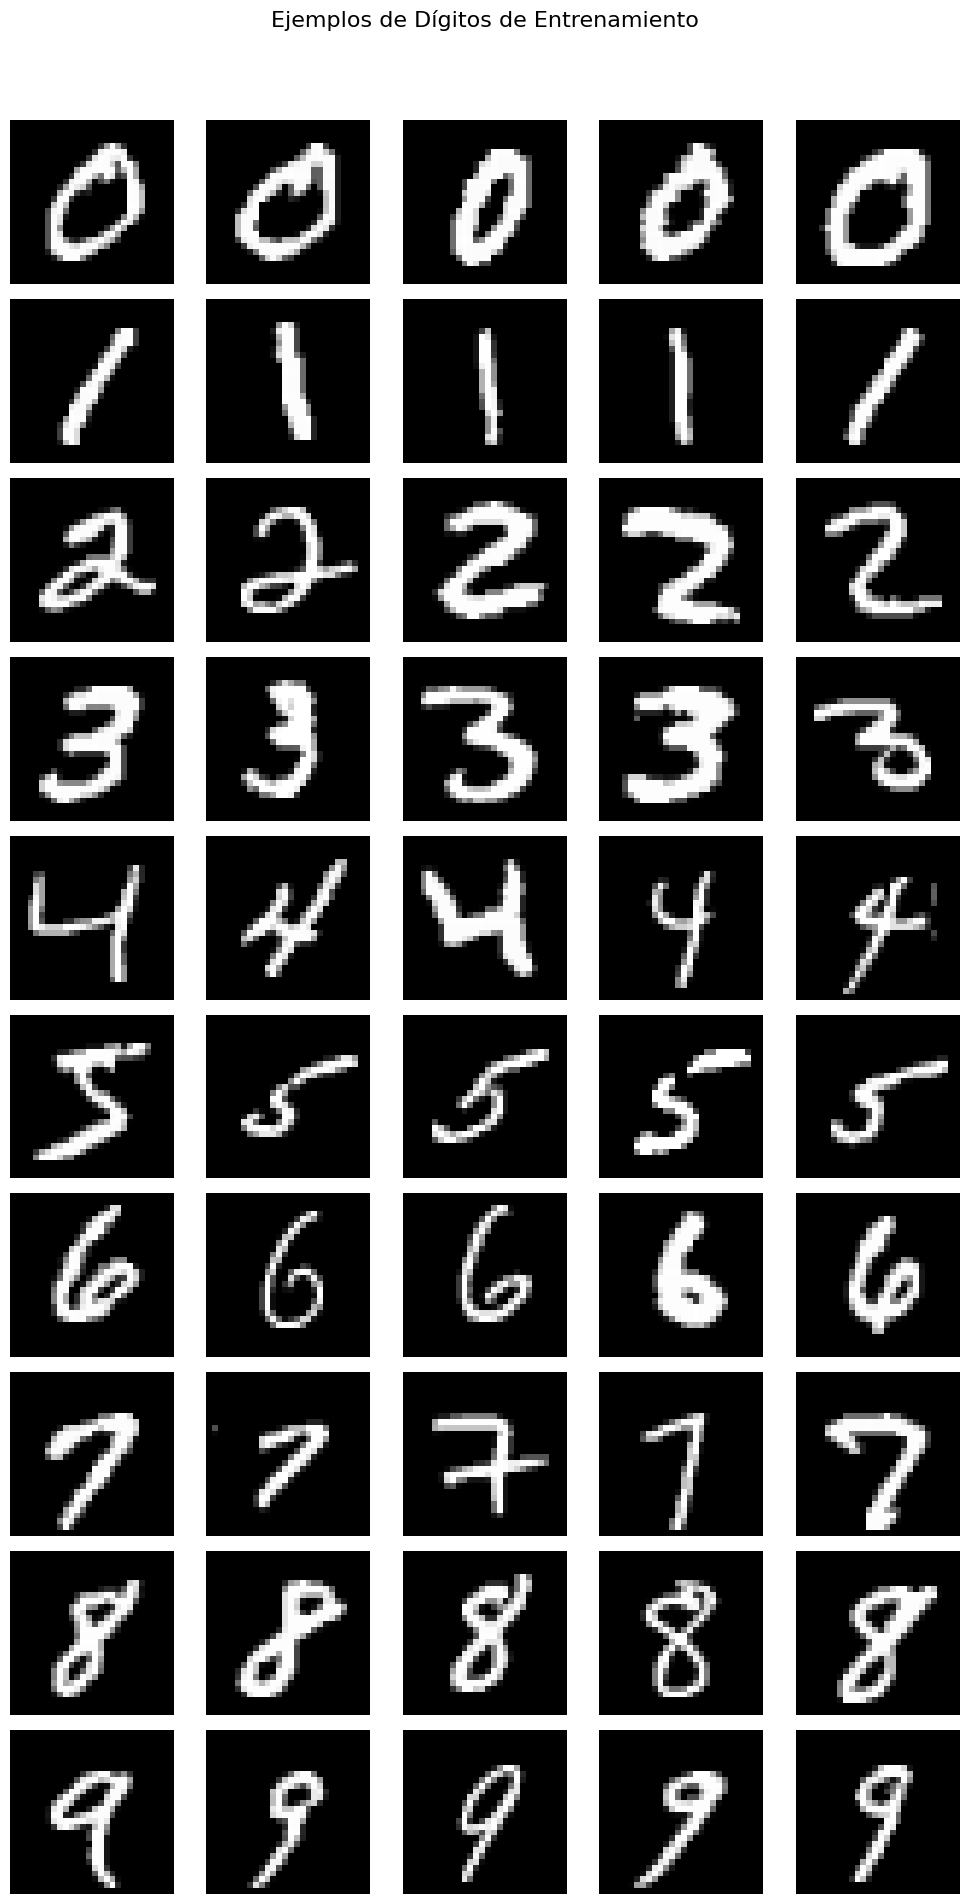

In [1]:
from main import entrenar_y_medir, load_df
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd
from plot import plot_predicted_digits

training_data, test_data = load_df()

In [2]:
net_configs = []
epochs = 30

# Configuración 1: Arquitectura más simple y tasa de aprendizaje media
net_configs.append({
    'architecture': [784, 30, 10],      # 1 capa oculta con 30 neuronas
    'epochs': epochs,                       # 30 épocas de entrenamiento
    'mini_batch_size': 10,              # Tamaño de mini-lote de 10
    'eta': 0.1                          # Tasa de aprendizaje media
})

# Configuración 2: Arquitectura con más capas y tasa de aprendizaje baja
net_configs.append({
    'architecture': [784, 10, 10, 10],  # 3 capas ocultas con 10 neuronas cada una
    'epochs': epochs,                       # 25 épocas de entrenamiento
    'mini_batch_size': 15,              # Tamaño de mini-lote de 15
    'eta': 0.05                         # Tasa de aprendizaje baja
})

# Configuración 3: Más neuronas por capa y tasa de aprendizaje alta
net_configs.append({
    'architecture': [784, 100, 10],     # 1 capa oculta con 100 neuronas
    'epochs': epochs,                       # 25 épocas de entrenamiento
    'mini_batch_size': 5,               # Mini-lotes pequeños de 5
    'eta': 0.2                          # Tasa de aprendizaje alta
})

# Configuración 4: Arquitectura con capas grandes y tasa de aprendizaje baja
net_configs.append({
    'architecture': [784, 512, 256, 10],# 2 capas ocultas con 512 y 256 neuronas
    'epochs': epochs,                       # 30 épocas de entrenamiento
    'mini_batch_size': 8,               # Mini-lotes pequeños de 8
    'eta': 0.01                         # Tasa de aprendizaje baja
})

# Configuración 5: Arquitectura con capas pequeñas y tasa de aprendizaje media
net_configs.append({
    'architecture': [784, 32, 16, 10],  # 2 capas ocultas con 32 y 16 neuronas
    'epochs': epochs,                       # 25 épocas de entrenamiento
    'mini_batch_size': 12,              # Tamaño de mini-lote de 12
    'eta': 0.1                          # Tasa de aprendizaje media
})

In [3]:
# Ejecutar el proceso en paralelo usando joblib.Parallel
results = Parallel(
    n_jobs=-1, backend='loky', prefer="processes"
)(
    delayed(entrenar_y_medir)(config, training_data, test_data) for config in tqdm(net_configs, desc='Procesando configuraciones')
)

Procesando configuraciones: 100%|██████████| 5/5 [00:00<00:00, 399.73it/s]


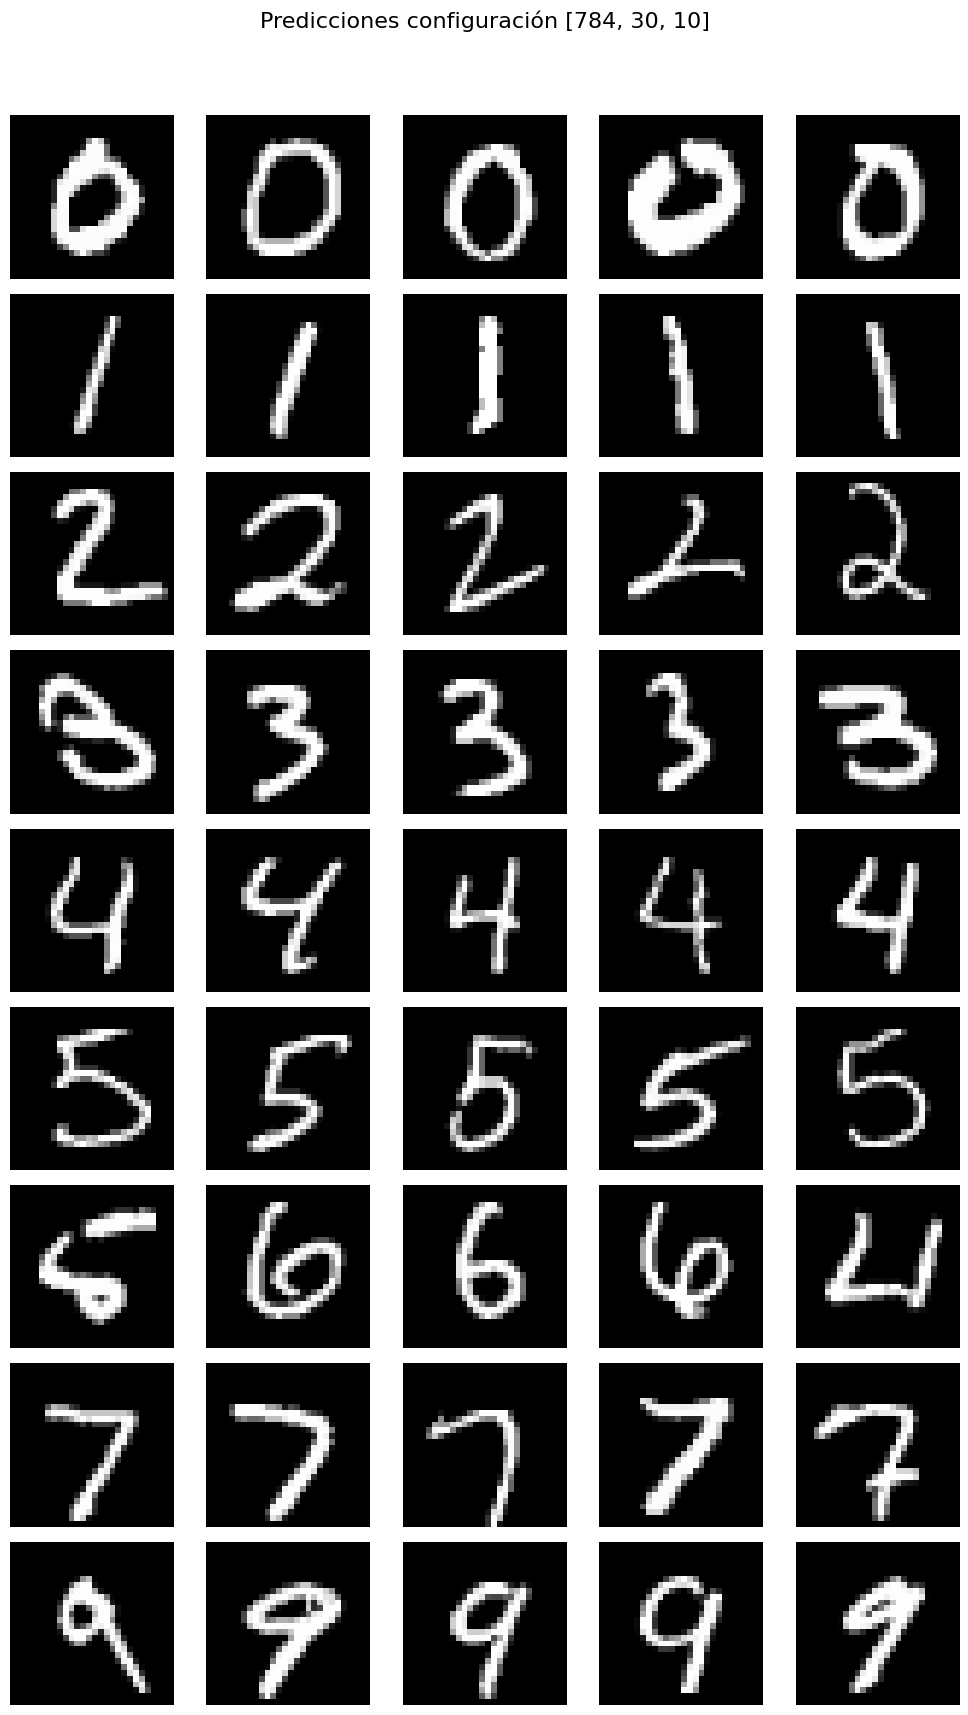

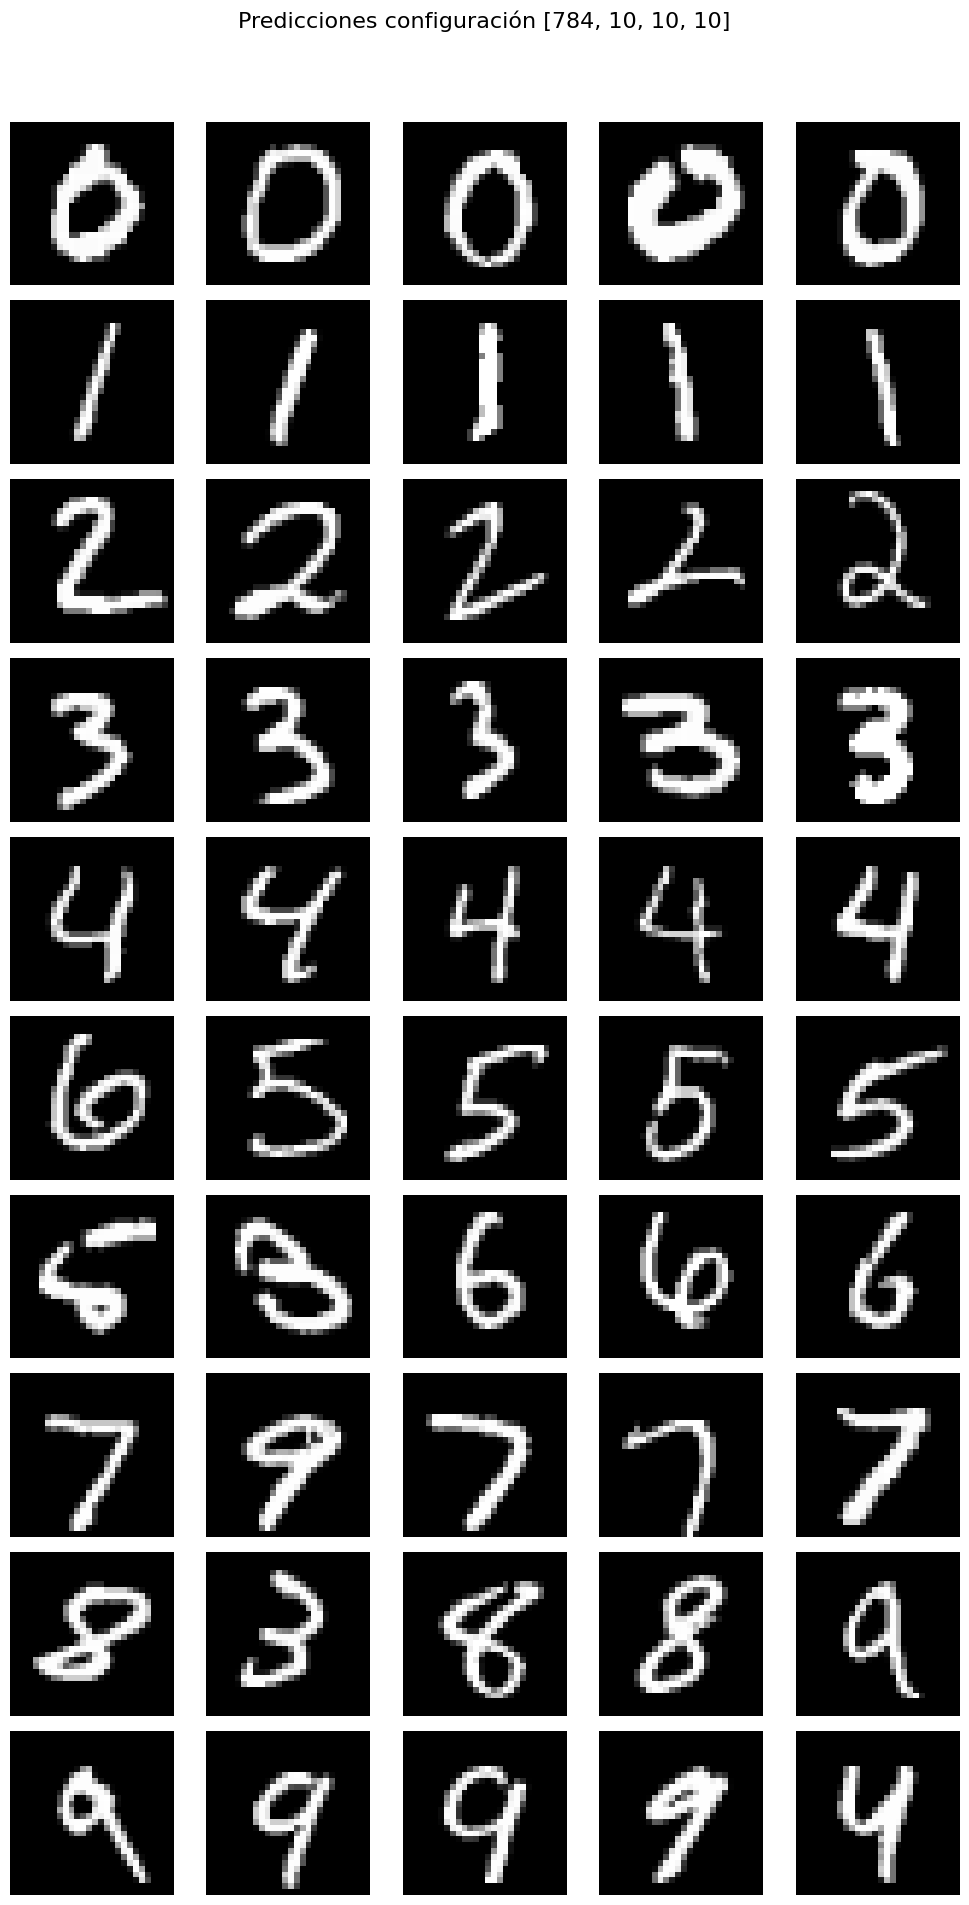

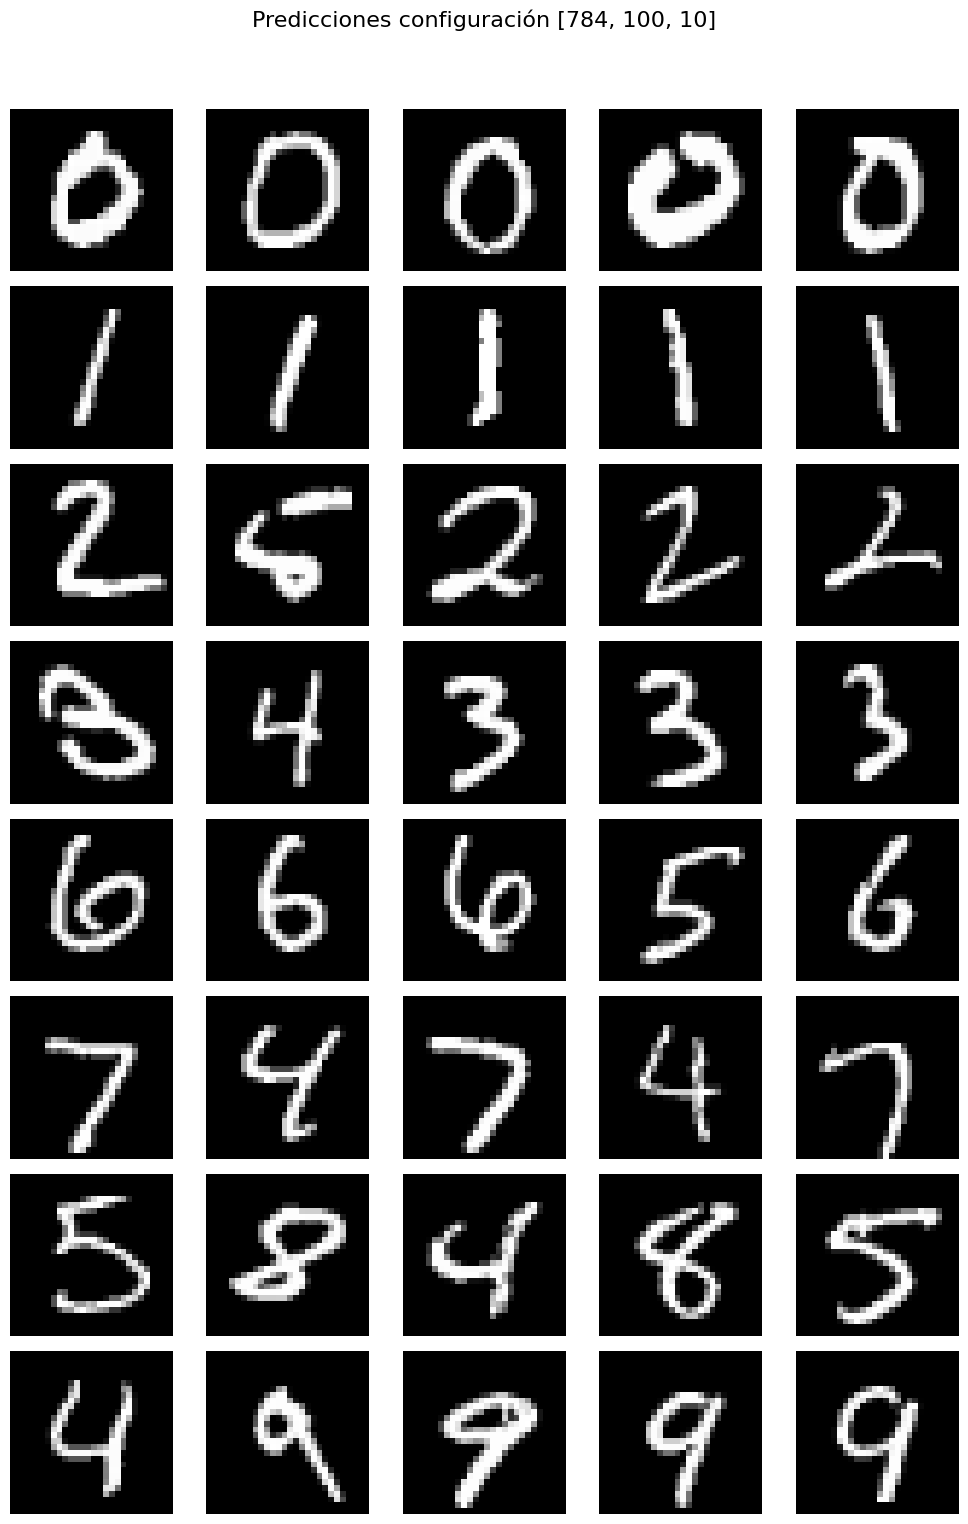

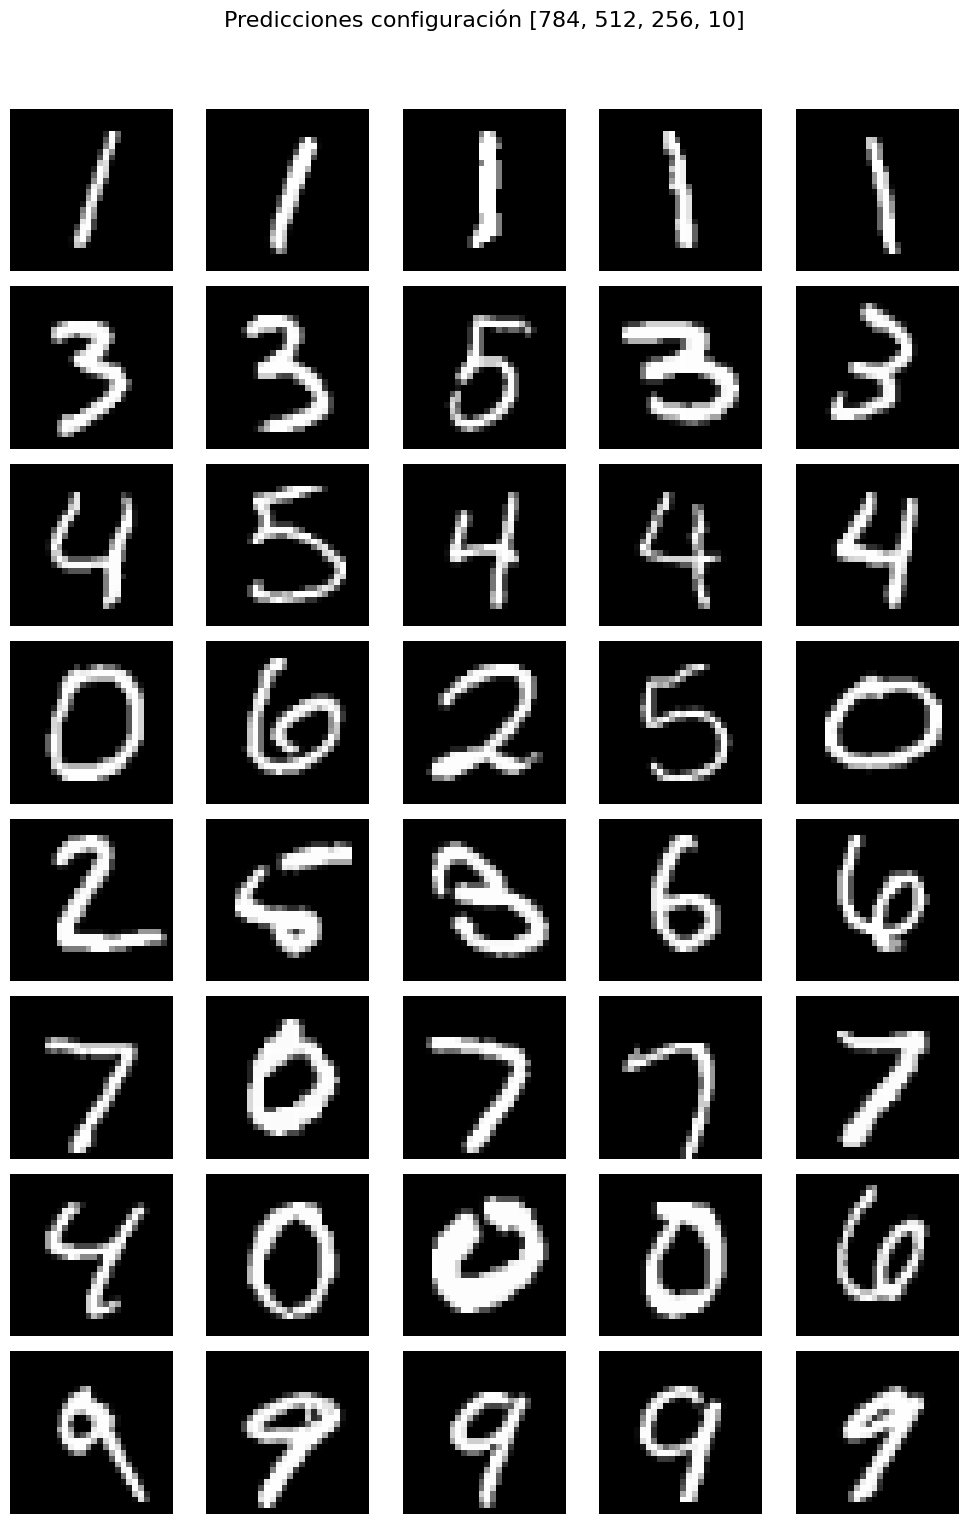

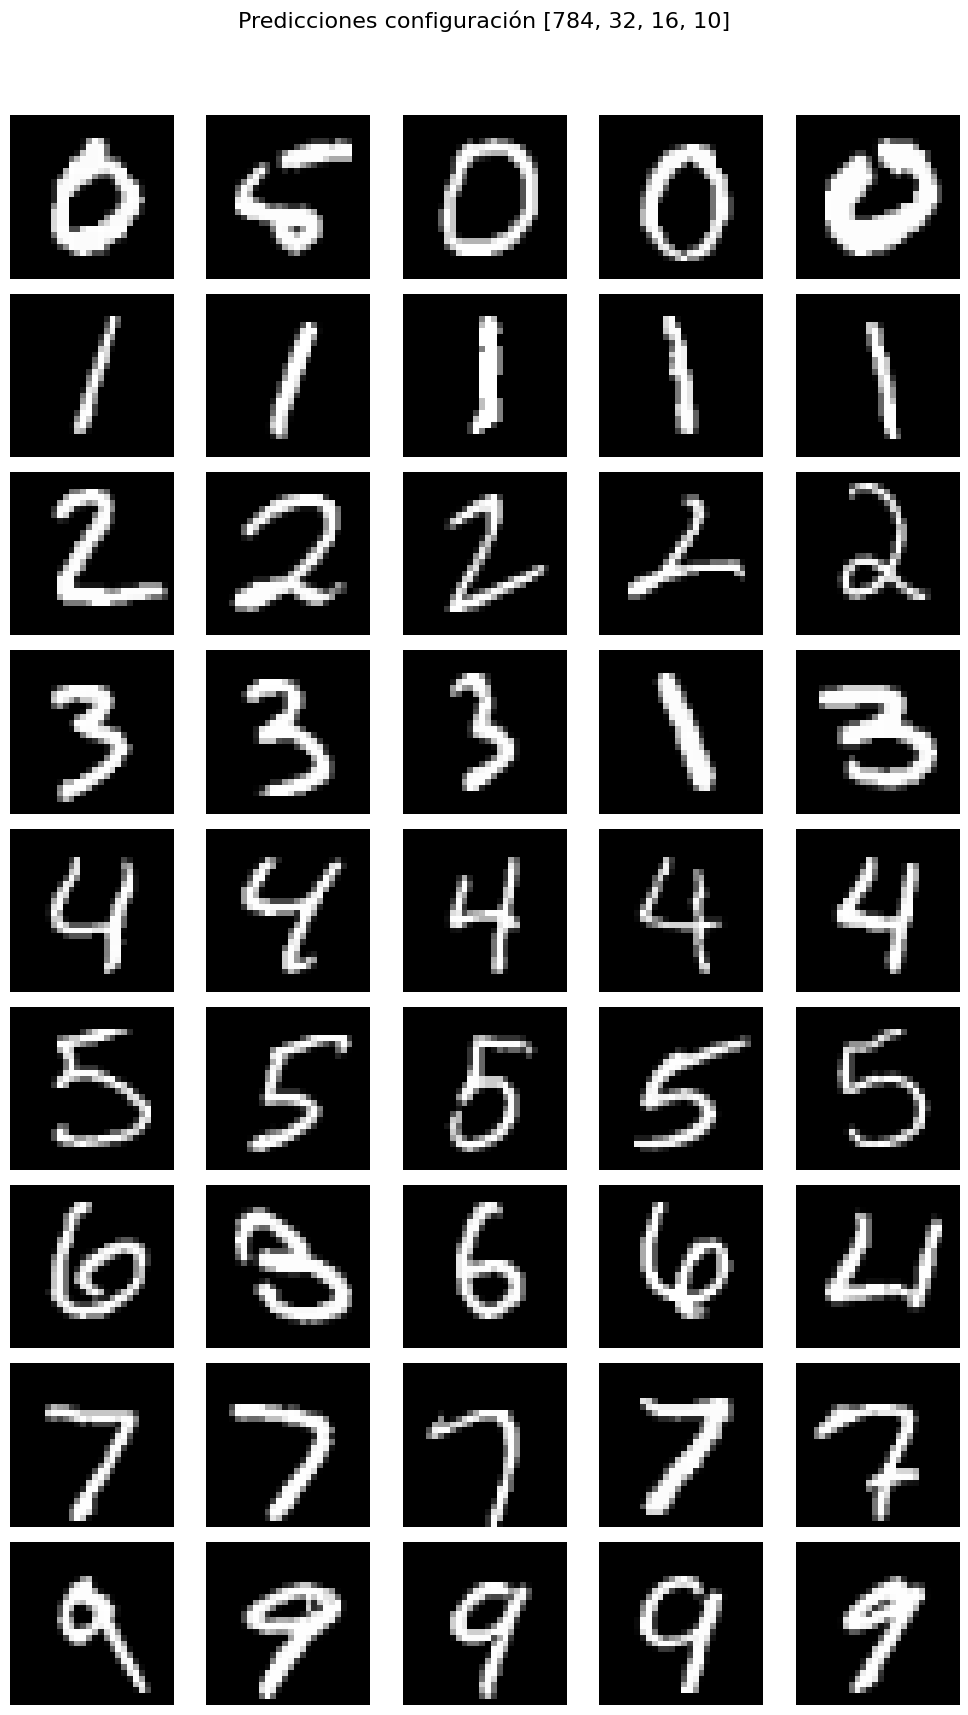

In [4]:
# Itera sobre las listas 'net_configs' y 'results' al mismo tiempo
for config, red in zip(net_configs, results):
    # Asigna el valor precision a la clave 'precision' en cada diccionario 'config'
    config['precision'] = red[1]
    # Asigna el objeto red a cada diccionario
    config['red'] = red[0]
    # Graficar para cada red
    plot_predicted_digits(red[0], test_data, title=f'Predicciones configuración {config["architecture"]}')


In [5]:
# Diccionarios como df
df_results = pd.DataFrame(net_configs)
# Ver resultados
df_results

,architecture,epochs,mini_batch_size,eta,precision,red
0,"[784, 30, 10]",30,10,0.10,92.13,<network.Network object at 0x00000226F706DF70>
1,"[784, 10, 10, 10]",30,15,0.05,85.31,<network.Network object at 0x00000226F7041670>
2,"[784, 100, 10]",30,5,0.20,78.14,<network.Network object at 0x00000226F696A870>
3,"[784, 512, 256, 10]",30,8,0.01,61.48,<network.Network object at 0x00000226F7014890>
4,"[784, 32, 16, 10]",30,12,0.10,91.89,<network.Network object at 0x00000226F706C0B0>


A partir de los resultados obtenidos de las redes entrenadas y aplicadas al conjunto de prueba, se pueden extraer varias conclusiones clave:

- Tamaño de la arquitectura:

    - Las redes con una arquitectura más simple, como [784, 30, 10] y [784, 32, 16, 10], alcanzaron precisiones relativamente altas del 92.13% y 91.89%, respectivamente. Estas redes tienen menos capas y neuronas, evidenciando como una estructura relativamente pequeña o sencilla puede ser suficiente para lograr buenos resultados.

    - Por otro lado, una red mucho más compleja, como [784, 512, 256, 10], alcanzó una precisión mucho más baja del 61.48%, lo que indica que en este caso una red con demasiadas capas o neuronas no necesariamente mejora el rendimiento, posiblemente debido a problemas de sobreajuste, falta de optimización adecuada o la tasa de aprendizaje.

- Tasa de aprendizaje (eta):

    - La tasa de aprendizaje tiene un impacto significativo en el rendimiento. La red con una tasa de 0.20 obtuvo una precisión baja del 78.14%, a pesar de tener una arquitectura relativamente sencilla [784, 100, 10], lo que sugiere que la tasa de aprendizaje es demasiado alta para esta arquitectura, esto podría haber causado inestabilidad en el entrenamiento.
    - Las tasas de aprendizaje más bajas como 0.01 y 0.05 también resultaron en precisiones más bajas (61.48% y 85.31%, respectivamente), lo que sugiere que tasas muy demasiado bajas tampoco son adecuadas para la obtención de buenos resultados.

- Tamaño del mini batch:

    - Los resultados muestran que el tamaño del mini batch también afecta el rendimiento, aunque no de manera tan drástica como la tasa de aprendizaje. Los mini batches de tamaño 10 y 12 parecen funcionar bien, mientras que tamaños más pequeños o más grandes (como 5 y 15) tienen un impacto negativo en algunas arquitecturas.

- Profundidad de la red:

Las redes con más capas, como [784, 10, 10, 10] y [784, 512, 256, 10], tienden a tener peores resultados, posiblemente porque añaden complejidad sin mejorar la capacidad de generalización en este caso. Esto podría deberse a que, no se necesita generalmente una red excesivamente profunda para capturar las características relevantes.

En conclusión, muchas veces arquitecturas simples y tasas de aprendizaje moderadas parecen ser más efectivas que redes más complejas con tasas de aprendizaje extremas (demasiado altas o bajas). Redes como [784, 30, 10] y [784, 32, 16, 10] con tasas de aprendizaje de 0.10 alcanzan un buen equilibrio, logrando altas precisiones sin complicar innecesariamente el entrenamiento.